In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [4]:
iris = datasets.load_iris()

NameError: name 'datasets' is not defined

In [31]:
type(iris)

sklearn.utils.Bunch

In [32]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [33]:
X = iris.data

In [34]:
Y = iris.target

In [35]:
df = pd.DataFrame(X, columns=iris.feature_names)

In [36]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [37]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [38]:
Col = ['Sepal_length', 'Sepal_width', 'Petal_length', 'petal_width', 'class' ]

In [39]:
Col

['Sepal_length', 'Sepal_width', 'Petal_length', 'petal_width', 'class']

In [40]:
Data = pd.read_csv(URL,header=None)

In [41]:
Data.columns = Col

In [42]:
Data

,Sepal_length,Sepal_width,Petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


{'whiskers': [<matplotlib.lines.Line2D at 0x1f68c662a20>,
 'caps': [<matplotlib.lines.Line2D at 0x1f68c67e160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f68c662710>],
 'medians': [<matplotlib.lines.Line2D at 0x1f68c67e860>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f68c67ebe0>],
 'means': []}

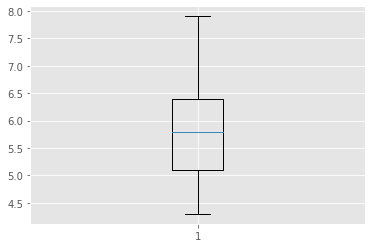

In [15]:
plt.boxplot([Data.Sepal_length])

<Figure size 2160x1152 with 0 Axes>

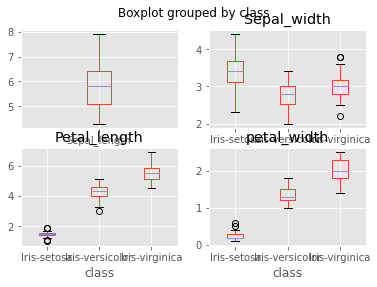

In [16]:
plt.figure(figsize=(30,16))
fig, axes=plt.subplots(nrows=2,ncols=2)
Data.boxplot(column='Sepal_length', ax = axes[0,0])
Data.boxplot(column='Sepal_width', by='class', ax = axes[0,1])
Data.boxplot(column='Petal_length', by='class', ax = axes[1,0])
Data.boxplot(column='petal_width', by='class', ax = axes[1,1])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1e8b915a780>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8b915ae80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8b915a470>],
 'medians': [<matplotlib.lines.Line2D at 0x1e8b91665c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e8b9166940>],
 'means': []}

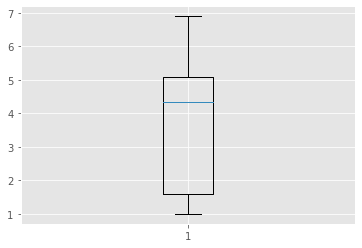

In [18]:
plt.boxplot([Data.Petal_length])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e8b91bccf8>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8b91cb438>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8b91bc9e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e8b91cbb38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e8b91cbeb8>],
 'means': []}

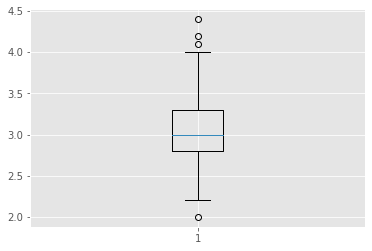

In [19]:
plt.boxplot([Data.Sepal_width])

In [43]:
Data.head()

,Sepal_length,Sepal_width,Petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
Data.tail()

,Sepal_length,Sepal_width,Petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [45]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [46]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


{'whiskers': [<matplotlib.lines.Line2D at 0x1e8b912d518>,
 'caps': [<matplotlib.lines.Line2D at 0x1e8b91401d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e8b911e240>],
 'medians': [<matplotlib.lines.Line2D at 0x1e8b8eafdd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e8b8eaffd0>],
 'means': []}

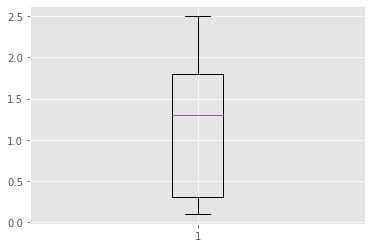

In [24]:
plt.boxplot([Data.petal_width])

In [25]:
Data.columns

Index(['Sepal_length', 'Sepal_width', 'Petal_length', 'petal_width', 'class'], dtype='object')

In [26]:
Data.shape

(150, 5)

In [27]:
import seaborn as sns

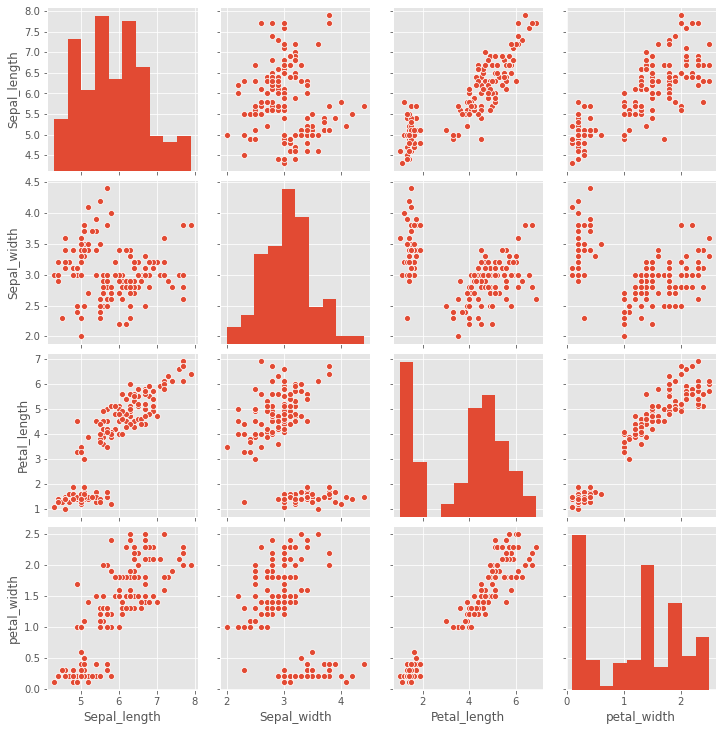

In [28]:
sns.pairplot(Data)

In [27]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F68C8E8E10>,
      dtype=object)

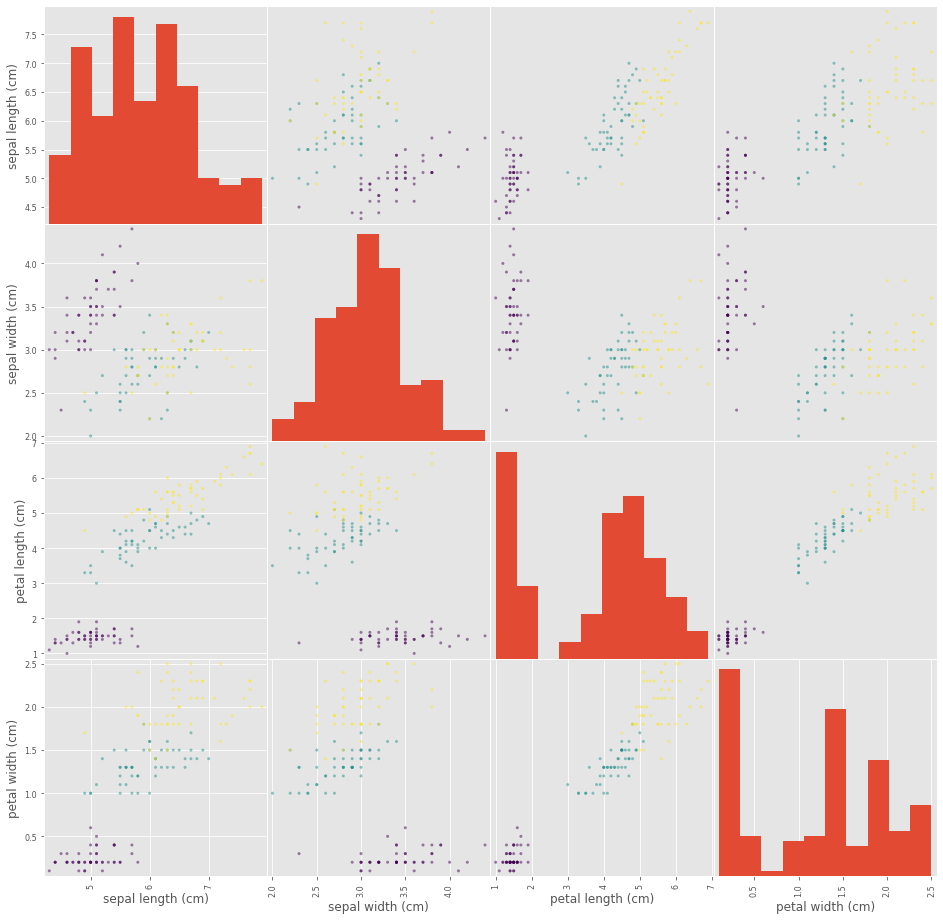

In [28]:
scatter_matrix(df, c =Y, figsize = [16, 16])

In [6]:
Co = Data.corr()
Co

NameError: name 'Data' is not defined

In [22]:
#knn

In [23]:
#knn.fit(iris['data'], iris['target'])

In [24]:
#iris['data'].shape

In [25]:
#iris['target'].shape

In [47]:
Data.isna().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
petal_width     0
class           0
dtype: int64

In [18]:
Data.columns

Index(['Sepal_length', 'Sepal_width', 'Petal_length', 'petal_width', 'class'], dtype='object')

In [51]:
Target

NameError: name 'Target' is not defined